# Vectorization and Plotting

In [3]:
import numpy as np

Vectorization is a fundamental concept in mathematical computing. The idea is simple but very powerful: take any function/operation $f(x)$ and apply it to a vector $\mathbf{x} = \begin{bmatrix} x_0 & x_1 & \cdots & x_N \end{bmatrix}$ elementwise simultaneously:

$$
f(\mathbf{x}) = \begin{bmatrix} f(x_0) & f(x_1) & \cdots & f(x_N) \end{bmatrix}
$$

The point is that vectorization simplifies our code and our computational thinking and we use it whenever we plot a function with NumPy and Matplotlib.

## Basic Plotting Procedure

To plot the graph of a function $y = f(x)$ over an interval $[a,b]$:

* Choose a finite set of increasing values $x_0 < x_1 < \cdots < x_N$ with $x_0 = a$ and $x_N = b$
* Compute the corresponding $y$ values $f(x_0),f(x_1),\dots,f(x_N)$
* Connect each pair of consecutive points by a straight line

Let's make a few simple observations. A larger number $N$ of $x$ values over the interval $[a,b]$:

* produces a smoother plot
* requires more computations to generate $y$ values
* requires more memory to store the $x$ and $y$ values

We need to use our own judgement to choose $N$ large enough so that the plot is smooth but small enough so that the amount of computation and memory required is not too big.

## Matplotlib

[Matplotlib](https://matplotlib.org) is the main plotting package in Python. It is a large package with lots of subpackages and we primarily use the subpackages `matplotlib.pyplot` for 2D plotting. Import using the keyword `import` and use the alias `plt`.

In [4]:
import matplotlib.pyplot as plt

The command `plt.plot(x,y)` creates the line plot which connects the points defined by the vectors `x` and `y`. For example, the following script plots the graph of $y = x^2$ using 7 points:

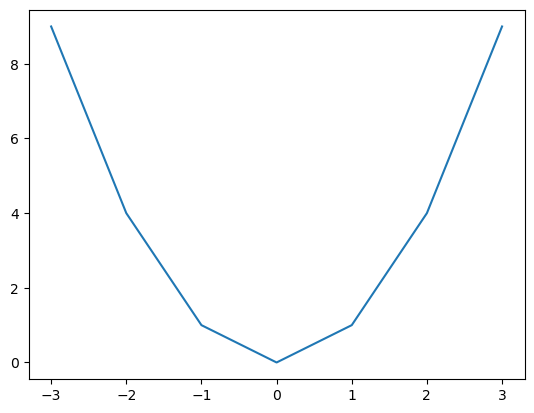

In [5]:
x = np.array([-3.,-2.,-1.,0.,1.,2.,3.])
y = np.array([9.,4.,1.,0.,1.,4.,9.])
plt.plot(x,y)
plt.show()

We need more points to plot the function smoothly but it is inefficient to manually enter the values in the vectors `x` and `y` as we did above. Plotting is an instance where vectorization is very useful:

* Use the function `np.linspace` to create a large number of $x$ values 
* Use vector operations and functions to create the corresponding vector of $y$ values
* Plot with `plt.plot(x,y)` and add style such as title, colors, line styles, legend, etc.

For example, let's use vectorization to plot $y = x^2$ on the interval $[-3,3]$ using 100 points:

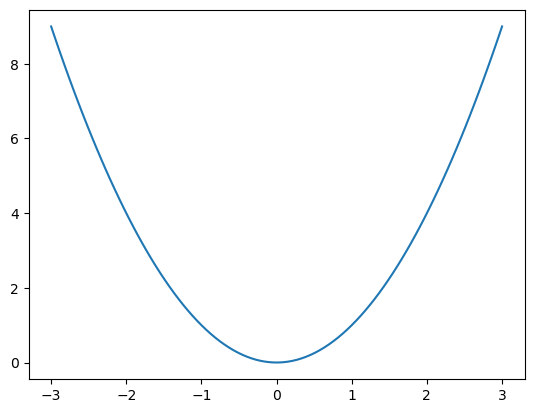

In [6]:
x = np.linspace(-3,3,100);
y = x**2;
plt.plot(x,y)
plt.show()

Let's take a closer look at the function `np.linspace` and vector operation `x**2`.

:::{seealso}
Check out [Mathematical Pyton > Matplotlib](https://patrickwalls.github.io/mathematicalpython/scipy/matplotlib/) for more about plotting with Matplotlib.
:::

## `np.linspace`

The function `np.linspace(a,b,N)` creates a vector of values from `a` to `b` using `N` equally spaced points. For example, create a vector of 9 evenly spaced values from 0 to 1:

In [10]:
x = np.linspace(0,1,9)
print(x)

[0.    0.125 0.25  0.375 0.5   0.625 0.75  0.875 1.   ]


The connection between the step size `h` and the number of points `N` is given by

$$
h = \frac{b - a}{N - 1}
$$

For example, the following commands create a vector `x` of values from 0 to 1 by step 0.25:

In [9]:
a = 0; b = 1; N = 5; h = (b - a)/(N - 1);
x = np.linspace(a,b,N)

In [10]:
print(h)

0.25


In [11]:
print(x)

[0.   0.25 0.5  0.75 1.  ]


## Vectorized Functions

All the mathematical functions in NumPy such as `np.sin`, `np.cos` and `np.exp` are *vectorized*. This means that we can apply a function to a vector and the result is the vector of function values. In other words, if $f(x)$ is a vectorized function and $\mathbf{x} = \begin{bmatrix} x_0 & x_1 & \cdots & x_N \end{bmatrix}$ is a vector then

$$
f(\mathbf{x}) = \begin{bmatrix} f(x_0) & f(x_1) & \cdots & f(x_N) \end{bmatrix}
$$

For example, the vectors `y1` and `y2` computed below are identical:

In [17]:
y1 = np.array([np.sin(0),np.sin(np.pi/4),np.sin(np.pi/2),np.sin(3*np.pi/4),np.sin(np.pi)])
print(y1)

[0.00000000e+00 7.07106781e-01 1.00000000e+00 7.07106781e-01
 1.22464680e-16]


In [18]:
x = np.array([0,np.pi/4,np.pi/2,3*np.pi/4,np.pi])
y2 = np.sin(x)
print(y2)

[0.00000000e+00 7.07106781e-01 1.00000000e+00 7.07106781e-01
 1.22464680e-16]


Note that `1e-16` is scientific notation for $10^{-16}$ which is very, very small. When we do numerical computations, there is sometimes some rounding error. But we usually interpret numbers like `1e-16` as 0.

Let's use just these 5 points to plot $y = \sin(x)$:

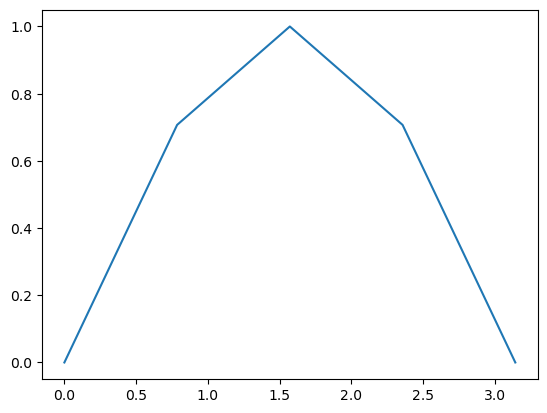

In [19]:
x = np.array([0,np.pi/4,np.pi/2,3*np.pi/4,np.pi])
y = np.sin(x)
plt.plot(x,y)
plt.show()

Clearly we need more points to plot the function smoothly. Let's use `np.linspace` to plot the function $y = \sin(x)$ over the interval $[0,\pi]$ using 100 points:

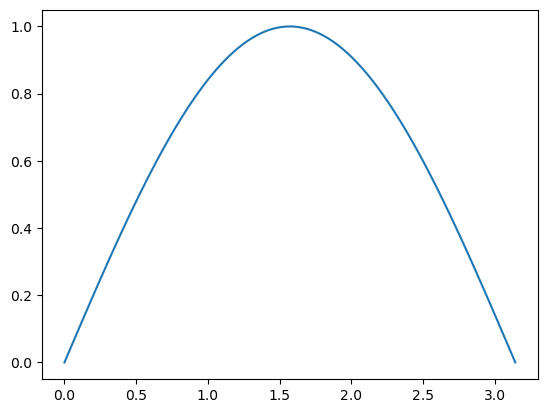

In [22]:
x = np.linspace(0,np.pi,100)
y = np.sin(x)
plt.plot(x,y)
plt.show()

## Vectorized Arithmetic Operations

Vector addition is defined by adding vectors entry-by-entry

$$
\mathbf{x} + \mathbf{y}
= \begin{bmatrix} x_0 \\ x_1 \\ \vdots \\ x_N \end{bmatrix}
+ \begin{bmatrix} y_0 \\ y_1 \\ \vdots \\ y_N \end{bmatrix}
= \begin{bmatrix} x_0 + y_0 \\ x_1 + y_1 \\ \vdots \\ x_N + y_N \end{bmatrix}
$$

Scalar multiplication is defined by multiplying a vector entry-by-entry by a scalar

$$
c \mathbf{x}
= c \begin{bmatrix} x_0 \\ x_1 \\ \vdots \\ x_N \end{bmatrix}
= \begin{bmatrix} c x_0 \\ c x_1 \\ \vdots \\ c x_N \end{bmatrix}
$$

Then how could we define $\mathbf{x} + c$ where $\mathbf{x}$ is a vector and $c$ is a scalar? Perform the operation entry-by-entry

$$
\mathbf{x} + c = \begin{bmatrix} x_0 \\ x_1 \\ \vdots \\ x_N \end{bmatrix} + c = \begin{bmatrix} x_0 + c \\ x_1 + c \\ \vdots \\ x_N + c \end{bmatrix}
$$

We also define vectorized multiplication, division and exponentiation:

| Vectorized Operation | NumPy Syntax |
| :---: | :---: |
| addition | `+` |
| subtraction | `-` |
| multiplication | `*` |
| division | `/` |
| exponentiation | `**` |

For example, the following script creates identical vectors `y1` and `y2`:

In [12]:
y1 = np.array([(-3.)**2,(-2.)**2,(-1.)**2,0.**2,1.**2,2.**2,3.**2])
print(y1)

[9. 4. 1. 0. 1. 4. 9.]


In [13]:
x = np.array([-3.,-2.,-1.,0.,1.,2.,3.])
y2 = x**2
print(y2)

[9. 4. 1. 0. 1. 4. 9.]


Use vectorization to plot $f(x) = 1 - x^2$ over the interval $[-3,3]$:

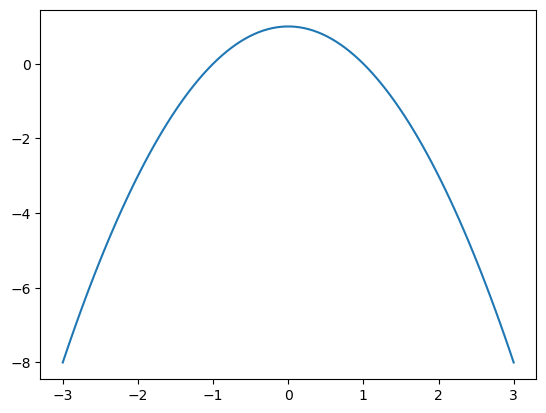

In [14]:
x = np.linspace(-3,3,100);
y = 1 - x**2;
plt.plot(x,y)
plt.show()

Create the vector of values $y = xe^{-x}$ for $x$ from 0 to 1 with step 0.25:

In [27]:
x = np.linspace(0,1,5)
y = x*np.exp(-x)
print(y)

[0.         0.1947002  0.30326533 0.35427491 0.36787944]


The values $y_k$ in the vector $\mathbf{y}$ correspond to $x_k$ in the vector $\mathbf{x}$ by:

$$
y_k = x_k e^{-x_k}
$$

The simple code above produces the same vector as the more verbose code below:

In [28]:
y = np.array([0*np.exp(-0),0.25*np.exp(-0.25),0.5*np.exp(-0.5),0.75*np.exp(-0.75),np.exp(-1)])
print(y)

[0.         0.1947002  0.30326533 0.35427491 0.36787944]


Use vectorization to plot $f(x) = x e^{-x}$ over the interval $[0,10]$:

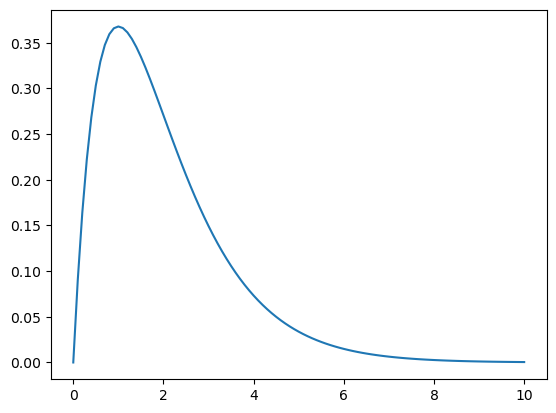

In [30]:
x = np.linspace(0,10,101)
y = x*np.exp(-x)
plt.plot(x,y)
plt.show()

## More Plotting Examples

Plot $f(x) = \displaystyle \frac{1}{1 + x^2}$ over the interval $[-6,6]$:

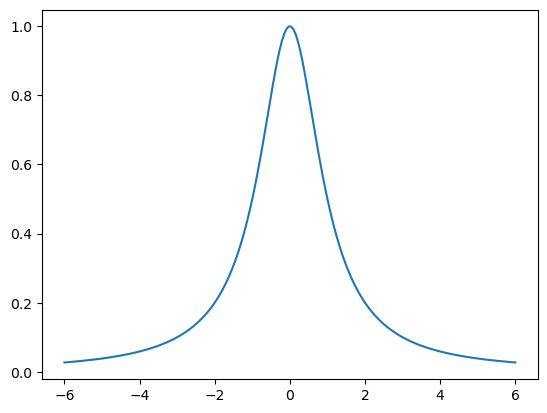

In [31]:
x = np.linspace(-6,6,200)
y = 1/(1 + x**2)
plt.plot(x,y)
plt.show()

Plot $f(x) = \cos(2 \pi x) + 2 \sin(3 \pi x)$ over the interval $[0,5]$:

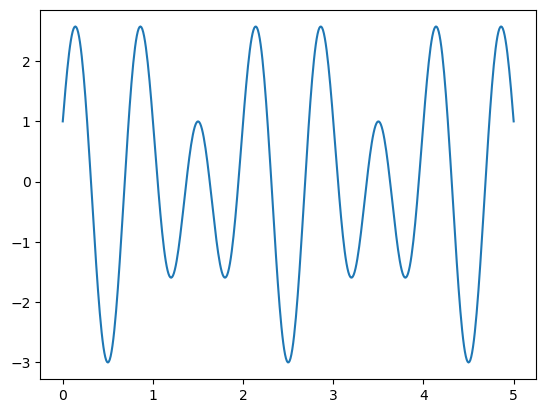

In [32]:
x = np.linspace(0,5,500);
y = np.cos(2*np.pi*x) + 2*np.sin(3*np.pi*x);
plt.plot(x,y)
plt.show()

## Exercises

**Exercise 1.** *Without running the code*, predict the values `y[0]`, `y[10]` and `y[20]` in the code below.

```python
x = np.linspace(-1,1,21)
y = 1 + x + x**2
```

**Exercise 2.** *Without running the code*, predict the values `y[0]`, `y[50]` and `y[100]` in the code below.

```python
x = np.linspace(0,2,101);
y = x*exp(-x**2);
```

**Exercise 3.** Plot $f(x) = \ln(1 + x)$ over the interval $[0,10]$.

**Exercise 4.** Plot $f(x) = \arctan(x)$ over the interval $[-5,5]$.

**Exercise 5.** Plot $f(x) = 1/\sqrt{1 + x^2}$ over the interval $[4,4]$.

**Exercise 6.** Plot $f(x) = e^{\sin(x)}$ over the interval $[0,4\pi]$.